In [1]:
import utilv2 as util
import torch
import numpy as np 
import gc 
import model as m 
from tqdm import tqdm 
import matplotlib.pyplot as plt

dev = torch.device('cuda')

'''
Note! change the device to cpu if you dont have 4GB GPU.

Also, the images should be in data/dataset/ folder. Originally, the data
is gathered from DIV2K dataset without any preprocess.
'''

In [2]:
loss_list = []

In [3]:
model = m.SRResNet(scaling_factor=2, in_channels=3, depth_channels=32, block_count=12).to(dev) # requires 4 GB GPU mem
optimizer = torch.optim.Adam(model.parameters())
loss_func = torch.nn.MSELoss()

In [4]:
def train(epoch=2, save=300):
    i = 0
    for original, downscaled in tqdm(util.DataIter('data/dataset', 2, 2)):
        original = original.to(dev)
        downscaled = downscaled.to(dev)

        for j in range(epoch):
            optimizer.zero_grad()
            upscaled = model(downscaled)

            # print(original.shape, downscaled.shape, upscaled.shape)

            loss = loss_func(upscaled, original)
            loss.backward()
            optimizer.step()

            loss_list.append(float(loss))
            i += 1

        original = original.cpu()
        downscaled = downscaled.cpu()
        upscaled = upscaled.cpu()
        
        if i % save == 0:
            util.save_instance(model, loss_list, 32, 12)

In [6]:
# train()
util.save_instance(model, loss_list, 32, 12)

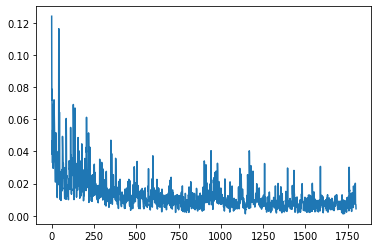

In [7]:
plt.plot(loss_list)

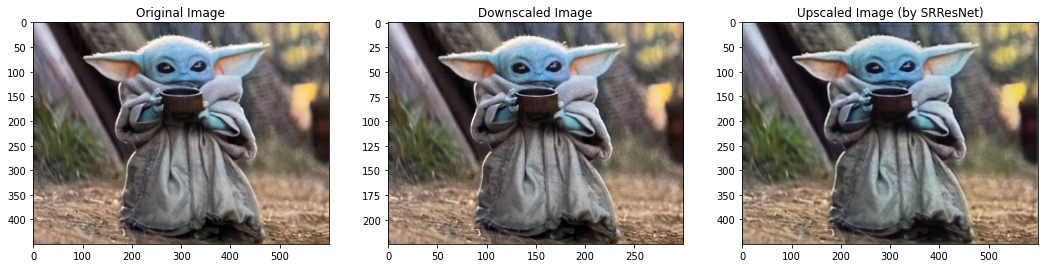

In [15]:
# util.display_in_plot(original, downscaled, upscaled, size=30)
util.demonstrate('demo/img3.jpeg', model.cpu())